# Modelagem de Tópicos com a TF-IDF

In [1]:
import numpy as np
import pandas as pd
import spacy
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [2]:
# Ler todos arquivos da Web of Science:
dados_total = pd.read_excel('dataframe_artigos.xlsx')

In [3]:
abstracts = dados_total["Abstract"] #.iloc[:1000]

abstracts = abstracts.dropna()

index = abstracts.index

titles = list()

for id in index:
    a = dados_total['Article Title'][id]
    titles.append(a)

In [6]:
nlp = spacy.load('en_core_web_sm')

abs = list()

for texto in abstracts:

    # Tookenização
    texto = nlp(texto)

    # Remover stop_words
    w = [t for t in texto if not t.is_stop and t.is_alpha] 

    # Transforma os tokens em string
    string = [str(word) for word in w]

    # Junta as strings em uma sentença
    string_resultante = ' '.join(string)
    
    # Armazena a sentença em uma lista 
    abs.append(string_resultante)

### Obter a TF-IDF.

In [7]:
tfidf = TfidfVectorizer()

csr_mat = tfidf.fit_transform(abstracts)

words = tfidf.get_feature_names_out()
#print(csr_mat)

In [8]:
# Visualizar vocabulario

tfidf.vocabulary_

{'we': 36538,
 'investigated': 19721,
 'the': 34225,
 'associations': 6859,
 'between': 7708,
 'dietary': 12598,
 'intake': 19399,
 'of': 25113,
 'folate': 15705,
 'and': 6056,
 'vitamin': 36333,
 'b2': 7216,
 'mthfr': 23372,
 'c677t': 8569,
 'genotype': 16383,
 'colorectal': 10240,
 'adenomas': 5113,
 'in': 18887,
 'dutch': 13410,
 'case': 8934,
 'control': 10985,
 'study': 33138,
 'data': 11862,
 'cases': 8941,
 'with': 36763,
 'at': 6900,
 'least': 20757,
 'one': 25289,
 'histologically': 17725,
 'confirmed': 10713,
 'adenoma': 5111,
 '768': 4034,
 'controls': 10992,
 'no': 24334,
 'history': 17744,
 'any': 6365,
 'type': 35281,
 'polyp': 27309,
 '709': 3882,
 'were': 36619,
 'included': 18945,
 'was': 36490,
 'assessed': 6827,
 'using': 35918,
 'food': 15732,
 'frequency': 15935,
 'questionnaire': 28706,
 'multivariable': 23526,
 'models': 23027,
 'age': 5421,
 'if': 18510,
 'appropriate': 6484,
 'calcium': 8646,
 'adjusted': 5195,
 'odds': 25084,
 'ratio': 28951,
 'or': 25430,
 '9

In [9]:
# Cria uma matriz de zeros
df_tf_idf = pd.DataFrame(csr_mat.toarray(), columns = words)

# Transpoe matriz
df_tf_idf.T

,0,1,2,3,4,5,6,7,8,9,...,9998,9999,10000,10001,10002,10003,10004,10005,10006,10007
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ǎi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ǐn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ǒng,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Função para exibir os tokens mais importantes de um documento.

In [10]:
def TF_IDF_func_presrntation(Num):

    DF = df_tf_idf.T[Num].nlargest(10)

    print( 'Doc number ' , Num+1)
    print( 30*'-')
    
    return DF

In [11]:
TF_IDF_func_presrntation(1652)

Doc number  1653
------------------------------


religious        0.626331
denomination     0.351588
commitment       0.305312
korean           0.238409
christian        0.211827
american         0.201270
women            0.170184
denominations    0.117196
catholic         0.108661
polychotomous    0.108661
Name: 1652, dtype: float64

### Calculando a SVD

In [12]:
# Reduzir a dimensicionalidade dos dados
svd = TruncatedSVD(n_components=10)
lsa = svd.fit_transform(csr_mat)

# Gerando matriz com as componestes 
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"])
topic_encoded_df["titles"] = titles
display(topic_encoded_df[["titles", "topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"]])

,titles,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
0,"Dietary intake of folate and riboflavin, MTHFR...",0.263983,0.128473,-0.055798,0.061000,0.107578,-0.140421,0.123726,-0.164155,0.141300,-0.033624
1,Human plasma carotenoid response to the ingest...,0.234045,-0.029218,-0.015617,-0.045003,0.005283,-0.033701,-0.004618,-0.132949,0.073999,-0.048914
2,Surveillance for Certain Health Behaviors and ...,0.255094,-0.047430,-0.009892,-0.130255,-0.077179,0.040087,0.012715,-0.033131,-0.029035,0.061979
3,Ethanol Consumption Does Not Promote Weight Ga...,0.195012,-0.043221,0.047467,-0.052214,0.054709,-0.053604,-0.042044,-0.129693,0.049429,-0.013033
4,Ghrelin regulates adipose tissue metabolism: R...,0.197334,-0.126856,0.016754,-0.042204,0.121886,0.015647,-0.037185,-0.048481,0.049537,-0.024011
...,...,...,...,...,...,...,...,...,...,...,...
10003,Increased risk of diseases of the basal gangli...,0.191929,-0.009233,-0.037371,-0.004016,-0.014305,0.025853,0.006875,-0.016452,-0.037473,-0.003316
10004,What is personalized medicine and what should ...,0.238844,-0.136920,0.029918,-0.052912,0.026430,-0.026289,0.007703,0.003114,-0.023371,0.031585
10005,Multiple health behaviours: overview and impli...,0.210656,-0.043148,0.027173,-0.112014,-0.069596,0.007805,0.034389,-0.048682,-0.083453,0.154849
10006,Risk factors for Epstein Barr virus-associated...,0.251845,-0.041303,-0.004006,0.008698,0.018293,-0.037325,0.044529,0.006198,-0.007979,0.069023


Vamos exibir a matriz token-tópico:

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

encoding_matrix = pd.DataFrame(svd.components_,
                               index=["topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"],
                               columns=words).T
encoding_matrix

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
00,0.009044,0.026784,-0.013847,0.002701,0.006858,-0.003101,-0.004697,0.002550,0.006713,0.003408
000,0.012822,-0.006373,0.003248,-0.024591,-0.009248,0.016570,-0.005701,0.060277,0.024708,-0.022763
0000,0.000080,-0.000125,-0.000270,0.000423,-0.000444,0.000294,0.000152,0.000254,-0.000335,-0.000508
000002,0.000020,-0.000049,-0.000058,0.000025,-0.000031,0.000042,0.000003,-0.000155,-0.000022,-0.000181
00001,0.000562,0.000862,0.000091,0.000934,0.001077,-0.000885,-0.000085,0.000385,-0.000512,-0.000161
...,...,...,...,...,...,...,...,...,...,...
zz,0.000038,-0.000105,-0.000131,-0.000131,0.000376,0.000339,-0.000033,0.000036,0.000072,-0.000033
ǎi,0.000026,-0.000085,-0.000023,0.000032,-0.000155,0.000041,0.000055,0.000147,-0.000070,-0.000175
ǐn,0.000026,-0.000085,-0.000023,0.000032,-0.000155,0.000041,0.000055,0.000147,-0.000070,-0.000175
ǒng,0.000026,-0.000085,-0.000023,0.000032,-0.000155,0.000041,0.000055,0.000147,-0.000070,-0.000175


Vamos ordenar tópico a tópico agora.

In [14]:
list_of_topics = ["topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"]

for topic in list_of_topics:
    encoding_matrix[topic] = np.abs(encoding_matrix[topic])

display(encoding_matrix.sort_values("topic_4", ascending=False))

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
hpv,0.027406,0.117279,0.121543,2.981805e-01,0.293547,0.077703,0.294465,0.021106,0.436739,0.447275
breast,0.087777,0.205882,0.661138,2.875148e-01,0.033763,0.261826,0.097311,0.095725,0.014002,0.028862
mortality,0.059613,0.052669,0.018915,2.638302e-01,0.073915,0.145685,0.041879,0.278022,0.312642,0.197335
patients,0.074739,0.125131,0.159039,2.071111e-01,0.135019,0.234055,0.083692,0.069763,0.150761,0.275506
health,0.054014,0.010325,0.028065,1.907305e-01,0.126255,0.037148,0.029878,0.065939,0.118074,0.160383
...,...,...,...,...,...,...,...,...,...,...
les,0.000059,0.000144,0.000120,3.497775e-08,0.000254,0.000187,0.000131,0.000252,0.000109,0.000265
bacteremia,0.000035,0.000042,0.000054,2.793241e-08,0.000043,0.000030,0.000014,0.000020,0.000090,0.000068
backgroundmost,0.000029,0.000163,0.000042,2.750330e-08,0.000028,0.000063,0.000060,0.000065,0.000084,0.000059
remodelling,0.000063,0.000252,0.000078,2.599777e-08,0.000379,0.000310,0.000198,0.000097,0.000041,0.000201


Podemos também graficar os tópicos como mostrado abaixo:

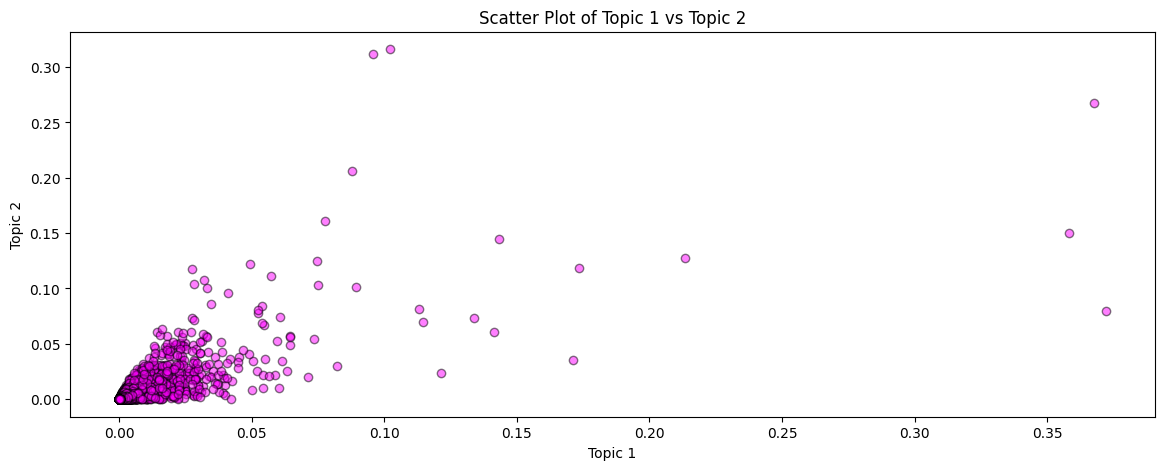

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,5))

ax.scatter(encoding_matrix["topic_1"], encoding_matrix["topic_2"], alpha=0.5, linewidths=1, edgecolors="black", c="fuchsia")

ax.set_xlabel('Topic 1')
ax.set_ylabel('Topic 2')
ax.set_title('Scatter Plot of Topic 1 vs Topic 2')

plt.show()

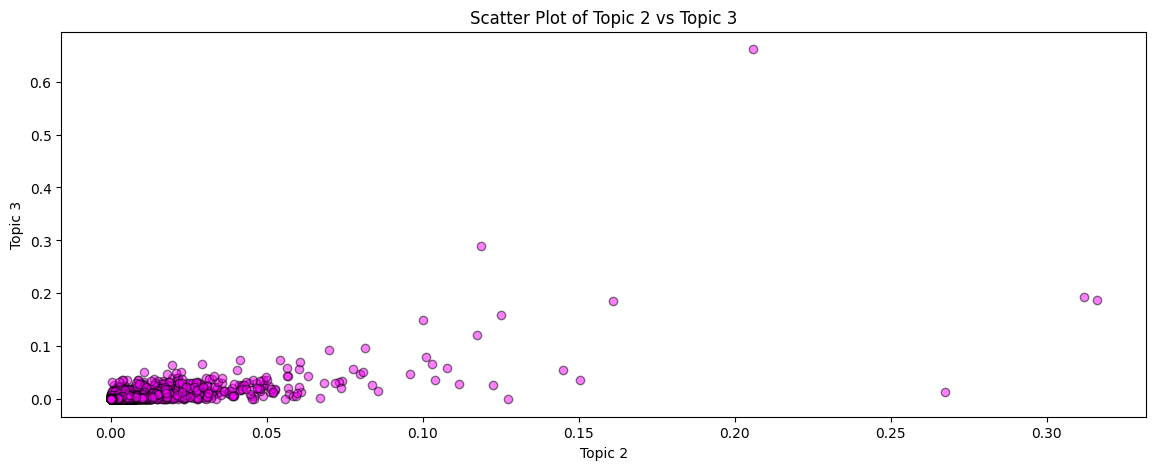

In [18]:
fig, ax = plt.subplots(figsize=(14,5))

ax.scatter(encoding_matrix["topic_2"], encoding_matrix["topic_3"], alpha=0.5, linewidths=1, edgecolors="black", c="fuchsia")

ax.set_xlabel('Topic 2')
ax.set_ylabel('Topic 3')
ax.set_title('Scatter Plot of Topic 2 vs Topic 3')

plt.show()

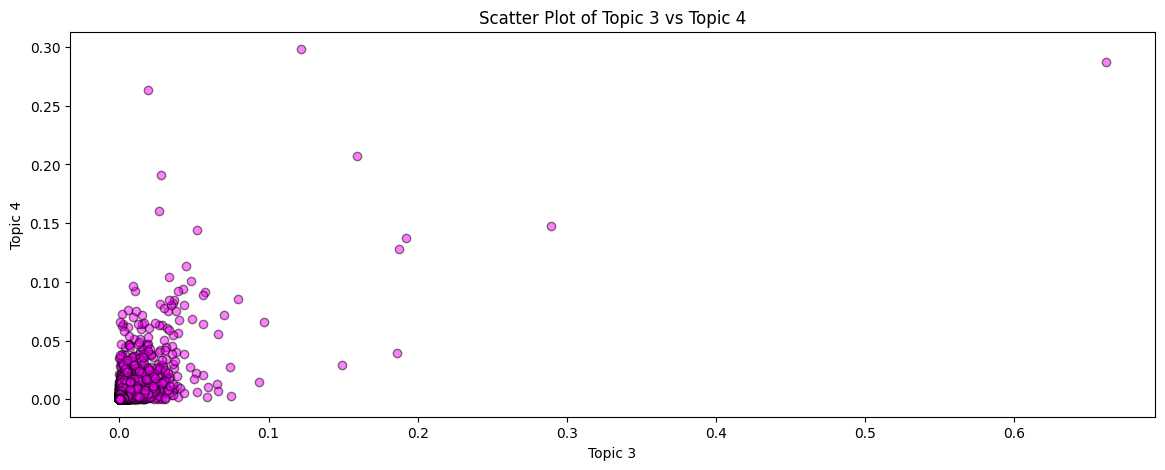

In [19]:
fig, ax = plt.subplots(figsize=(14,5))

ax.scatter(encoding_matrix["topic_3"], encoding_matrix["topic_4"], alpha=0.5, linewidths=1, edgecolors="black", c="fuchsia")

ax.set_xlabel('Topic 3')
ax.set_ylabel('Topic 4')
ax.set_title('Scatter Plot of Topic 3 vs Topic 4')

plt.show()

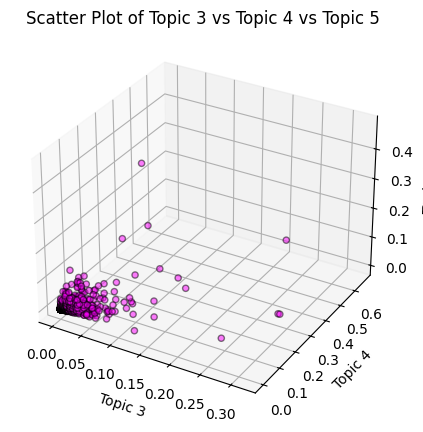

In [20]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(projection='3d')

ax.scatter(encoding_matrix["topic_2"].values, encoding_matrix["topic_3"].values, encoding_matrix["topic_5"].values, alpha=0.5, linewidths=1, edgecolors="black", c="fuchsia")

ax.set_xlabel('Topic 3')
ax.set_ylabel('Topic 4')
ax.set_zlabel('Topic 5')
ax.set_title('Scatter Plot of Topic 3 vs Topic 4 vs Topic 5')

plt.show()

### Agrupamento com k-means

Inspirados pelos gráficos anteriores, podemos realizar um agrupamento dos dados, como já aprendemos na Disciplina de Aprendizado de máquina, podemos utilizar o k-means. Façamos isso então:

In [21]:
svd = TruncatedSVD(n_components=10)
kmeans = KMeans(n_clusters=10)
pipeline = make_pipeline(svd, kmeans)
pipeline.fit(csr_mat)
labels = pipeline.predict(csr_mat)

c:\venv\ilumpy\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\venv\ilumpy\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\venv\ilumpy\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [22]:
df = pd.DataFrame({'labels': labels, 'docs': titles, 'abstract': abstracts})
print(df.sort_values('labels'))

       labels                                               docs  \
4204        0  Risk factors for second primary neoplasia of e...   
5290        0  Major Low Anterior Resection Syndrome (LARS) a...   
8372        0  Cyclooxygenase-2 is overexpressed in chronic p...   
5288        0  Epistasis of oxidative stress-related enzyme g...   
2402        0  A Model Shows Utility in Predicting Postoperat...   
...       ...                                                ...   
7469        9  Exposure to Famine at a Young Age and Unhealth...   
9315        9  Reduction of alcohol use and increase in psych...   
9314        9  Understanding What Changes Adults in a Smoking...   
1399        9  The Association Between Perceived Social Suppo...   
10412       9  Prescription opioid use: Patient characteristi...   

                                                abstract  
4204   Background: The prevalence of esophageal neopl...  
5290   BackgroundRectal resection with total mesorect...  
8372  

Salvanto planilha com a classificação por tópicos.

In [62]:
#df.to_excel('topics.xlsx')